### Stroke Prediction Group Project 
Ashi,Pranjal, Swapnil, Salaah, Sai

In [1]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Setting df as the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
# Printing the first 5 columns of data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA (Exploratory Data Analysis) 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<AxesSubplot:>

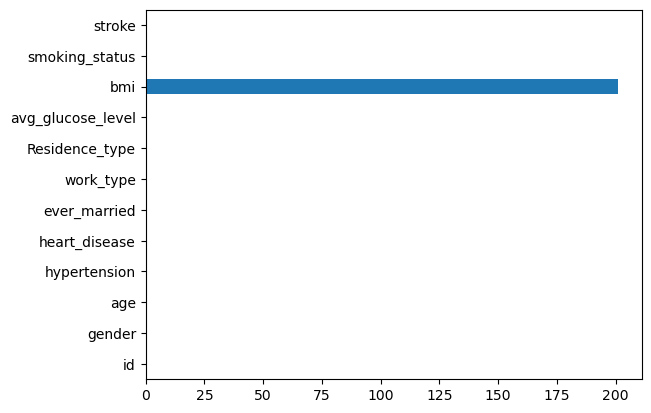

In [4]:
#checking for null values in the data set
print(df.isna().sum())

df.isna().sum().plot.barh()

In [5]:
# Statiscal analytics of the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Checking value count in the gender column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

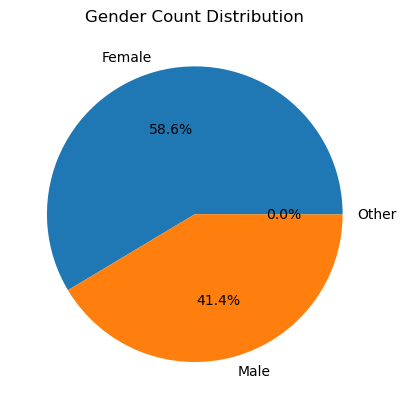

In [8]:
# plotting a pie chart to see the gender count distribution
gender_counts = df['gender'].value_counts()

# Plot the pie chart with value counts as labels
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Count Distribution')
plt.show()

# Pre processing of data of ML model 

In [9]:
## Our target feature is Stroke

In [10]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

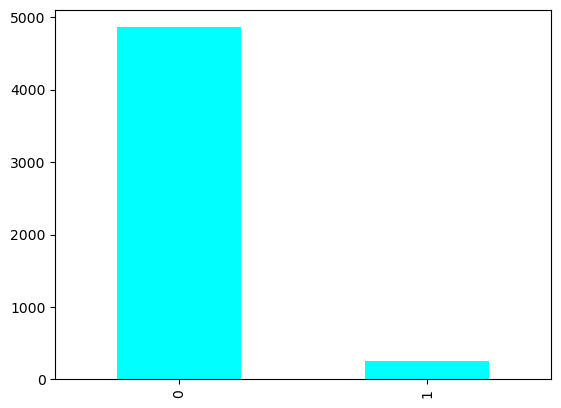

In [11]:
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [12]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)


% of people who actualy got a stroke :  4.9


### * Our dataset is highly skewed since only around 5% of the instances got stroke
### * We will be needing to perform necessary transformations to improve samples of minority class


### Parameter Analysis

<AxesSubplot:>

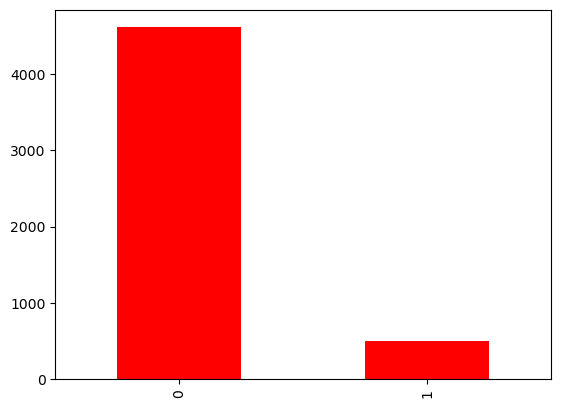

In [13]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")


In [14]:
# Value of count of work-type attribute
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:ylabel='work_type'>

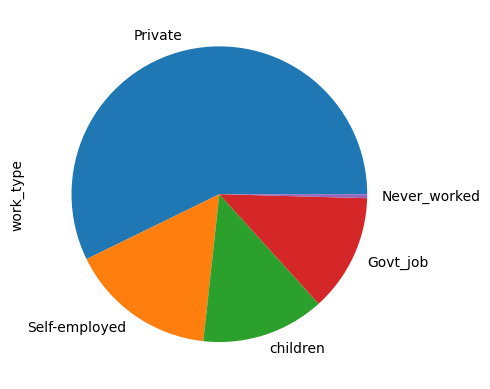

In [15]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

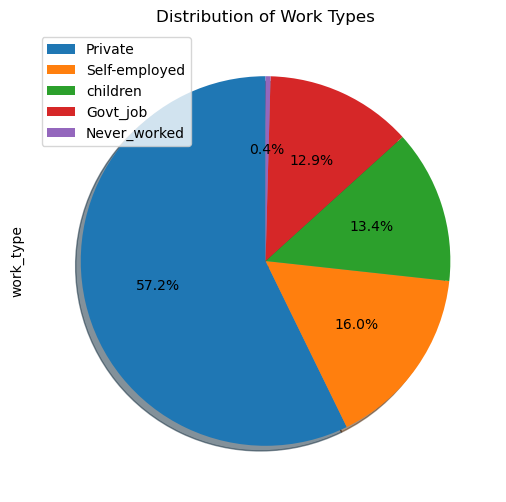

In [16]:
plt.figure(figsize=(8, 6))
ax = df['work_type'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, shadow=True, labels=None)

# add labels and title
plt.legend(labels=df['work_type'].value_counts().index, loc="best")
plt.title("Distribution of Work Types")

# show the plot
plt.show()

In [17]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:ylabel='smoking_status'>

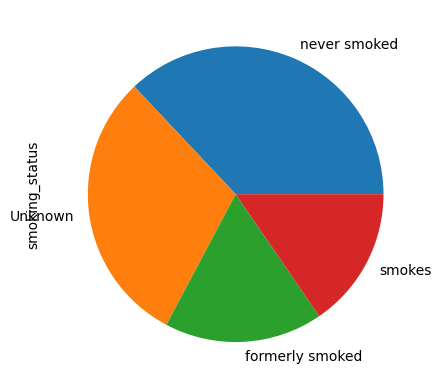

In [18]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

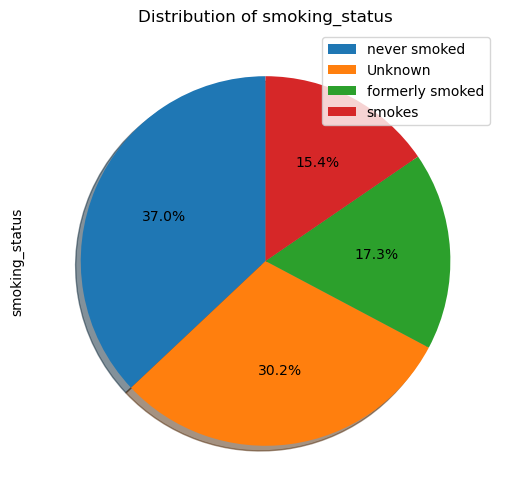

In [19]:
plt.figure(figsize=(8, 6))
ax = df['smoking_status'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, shadow=True, labels=None)

# add labels and title
plt.legend(labels=df['smoking_status'].value_counts().index, loc="best")
plt.title("Distribution of smoking_status")

# show the plot
plt.show()

## Residence Type Analysis

In [20]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:ylabel='Residence_type'>

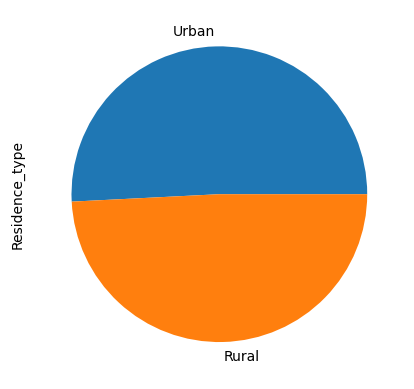

In [21]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

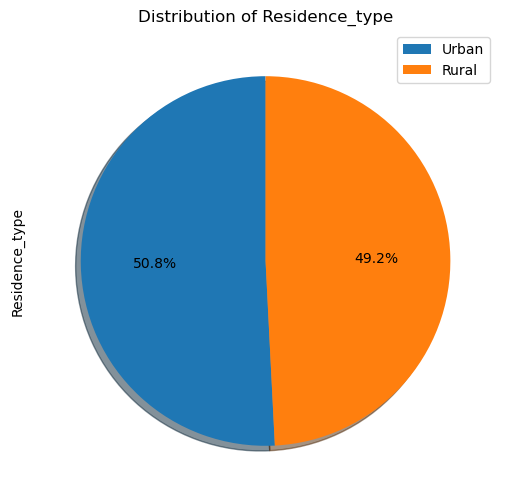

In [22]:
plt.figure(figsize=(8, 6))
ax = df['Residence_type'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, shadow=True, labels=None)

# add labels and title
plt.legend(labels=df['Residence_type'].value_counts().index, loc="best")
plt.title("Distribution of Residence_type")

# show the plot
plt.show()

In [23]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

201

<AxesSubplot:xlabel='bmi', ylabel='Count'>

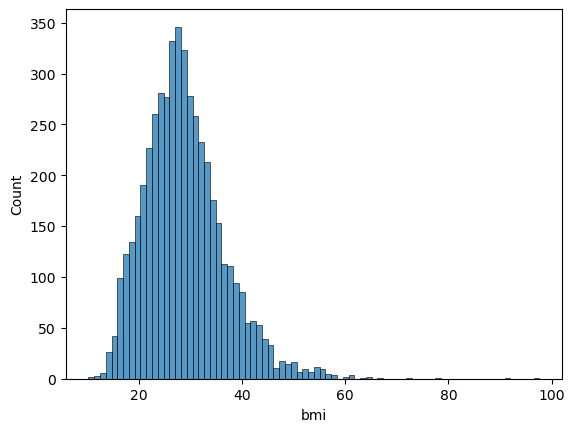

In [24]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

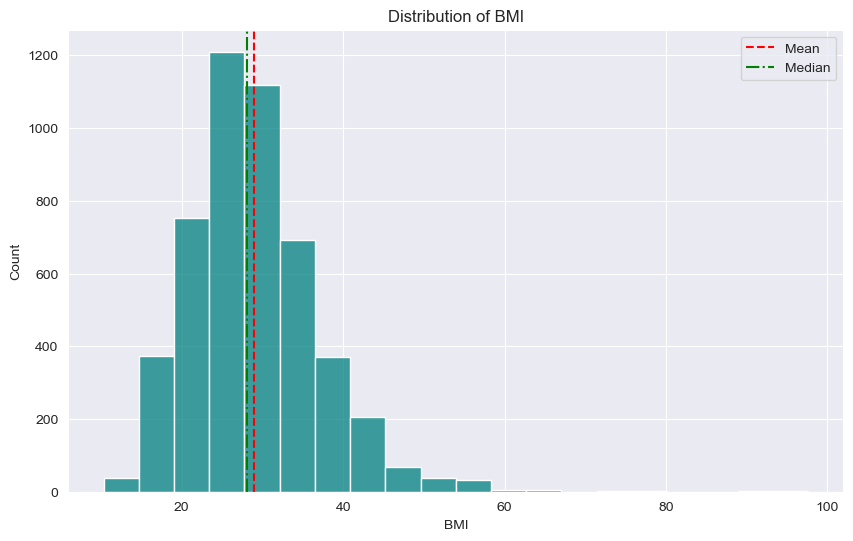

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df['bmi'], kde=False, bins=20, color='teal')

# set labels and title
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# add vertical lines for mean and median
mean_bmi = df['bmi'].mean()
median_bmi = df['bmi'].median()
plt.axvline(mean_bmi, color='red', linestyle='--', label='Mean')
plt.axvline(median_bmi, color='green', linestyle='-.', label='Median')
plt.legend()

# show the plot
plt.show()

<AxesSubplot:>

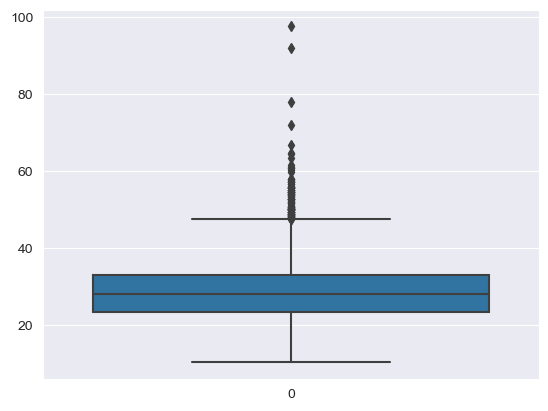

In [26]:
sns.boxplot(data=df['bmi'])

In [27]:
# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    5000
True      110
Name: bmi, dtype: int64

In [28]:
# Percentage of NULL values in bmi
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

In [29]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [30]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

4.87279843444227

In [31]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [32]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [33]:
df['bmi'].isnull().sum()

0

<AxesSubplot:xlabel='age', ylabel='Count'>

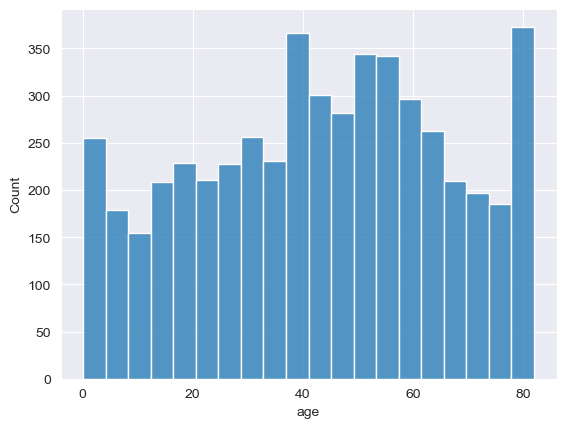

In [34]:
sns.histplot(data=df['age'])

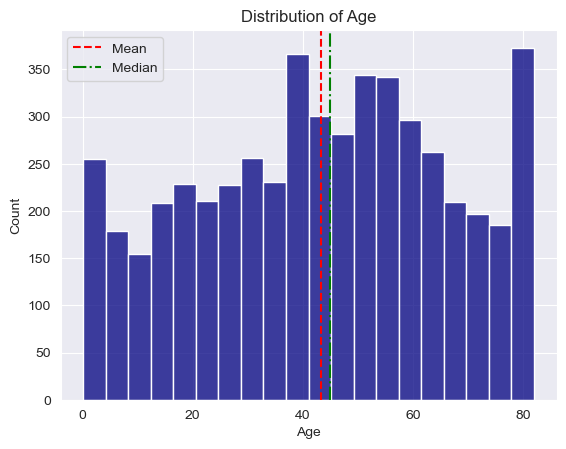

In [35]:
ax = sns.histplot(data=df['age'], kde=False, bins=20, color='navy')

# set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# add vertical lines for mean and median
mean_age = df['age'].mean()
median_age = df['age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label='Mean')
plt.axvline(median_age, color='green', linestyle='-.', label='Median')
plt.legend()

<AxesSubplot:>

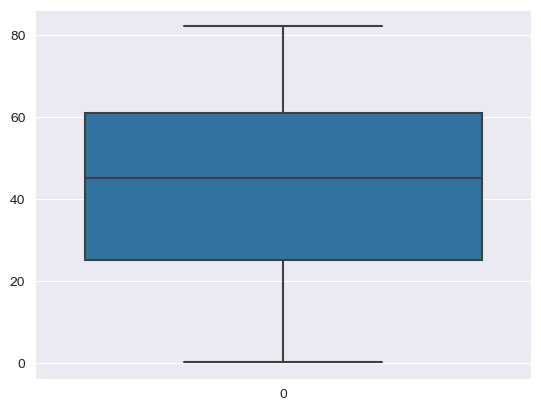

In [36]:
# boxplot
sns.boxplot(data=df['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

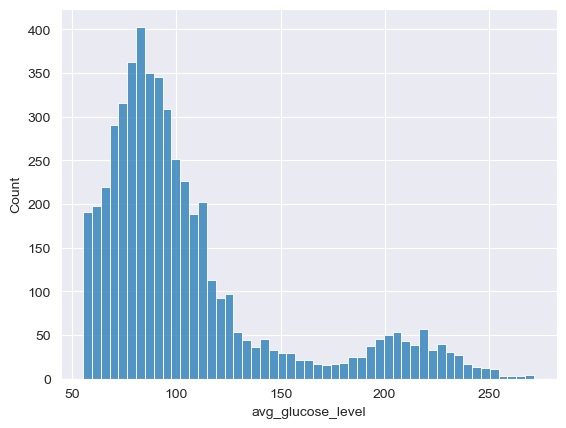

In [37]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<AxesSubplot:>

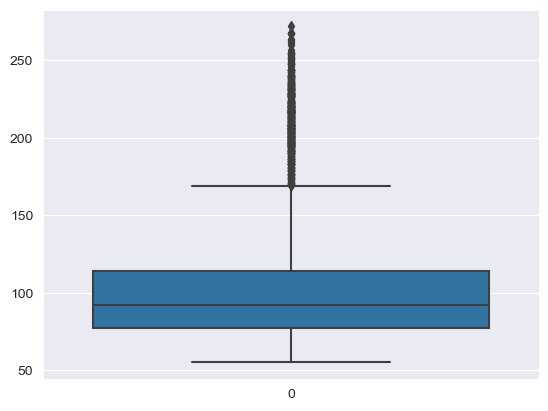

In [38]:
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

There are many outliers present based on the boxplot and histogram
The data is positively skewed


In [39]:

# Finding the count of outliers based on those instances which are out of iqr 
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()


False    4483
True      627
Name: avg_glucose_level, dtype: int64

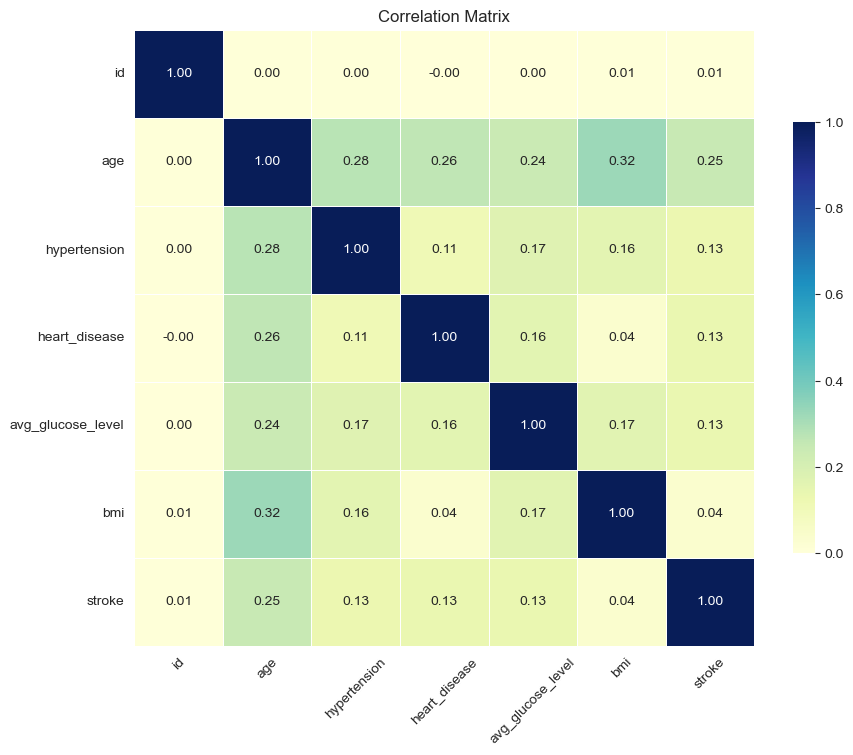

In [40]:
# create the correlation matrix
corrmat = df.corr()

# set up the figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Correlation Matrix')

# create the heatmap
sns.heatmap(corrmat, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.2f', cbar_kws={'shrink': 0.7})

# rotate the x-axis labels
plt.xticks(rotation=45)

# show the plot
plt.show()


## Heart_disease analysis

In [41]:
# # Value count of heart disease attribute
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

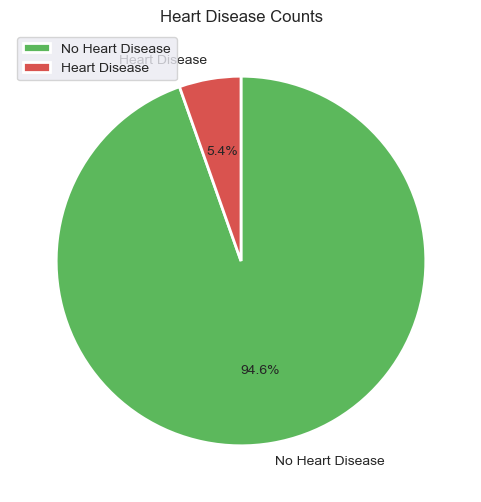

In [42]:
# create the value counts for the heart disease attribute
heart_disease_counts = df['heart_disease'].value_counts()

# set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Heart Disease Counts')

# create the pie chart
pie = ax.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], colors=['#5cb85c', '#d9534f'], autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# add a legend
ax.legend(pie[0], ['No Heart Disease', 'Heart Disease'], loc='upper left')

# show the plot
plt.show()


## Ever_married analysis with Values

In [43]:
# Value count of evver married attribute
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

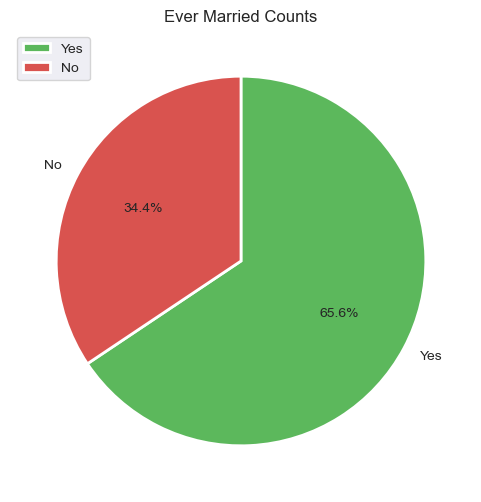

In [44]:
import matplotlib.pyplot as plt

# create the value counts for the ever_married attribute
ever_married_counts = df['ever_married'].value_counts()

# set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Ever Married Counts')

# create the pie chart
pie = ax.pie(ever_married_counts, labels=ever_married_counts.index, colors=['#5cb85c', '#d9534f'], autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# add a legend
ax.legend(pie[0], ever_married_counts.index, loc='upper left')

# show the plot
plt.show()


## Cross analysis - all the attribute compared with target attibute

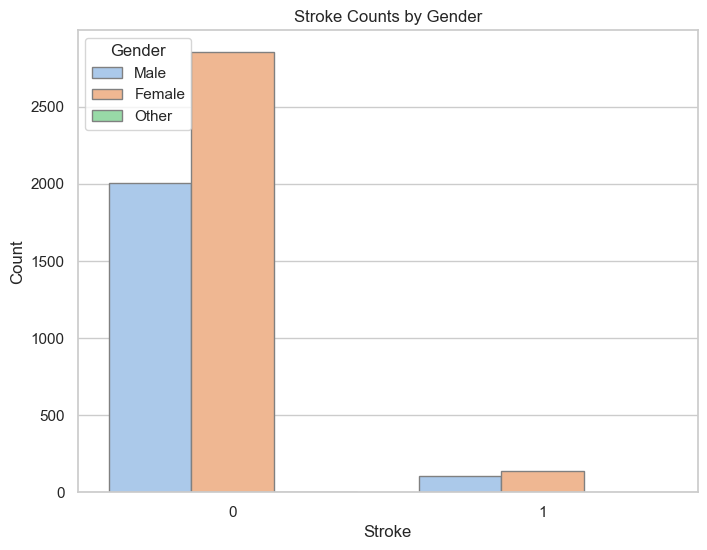

In [45]:
# create the plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='stroke', hue='gender', data=df, palette='pastel', edgecolor='gray', ax=ax)

# add titles and labels
ax.set_title('Stroke Counts by Gender')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')
ax.legend(title='Gender')

# show the plot
plt.show()


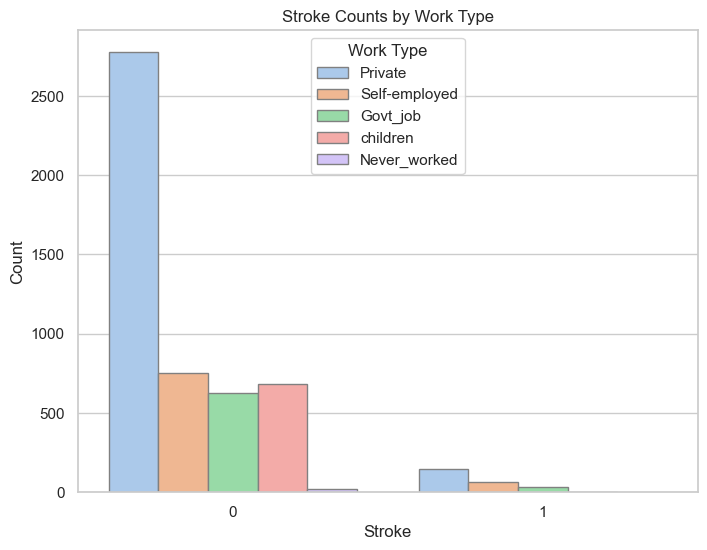

In [46]:
# create the plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='stroke', hue='work_type', data=df, palette='pastel', edgecolor='gray', ax=ax)

# add titles and labels
ax.set_title('Stroke Counts by Work Type')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')
ax.legend(title='Work Type')

# show the plot
plt.show()


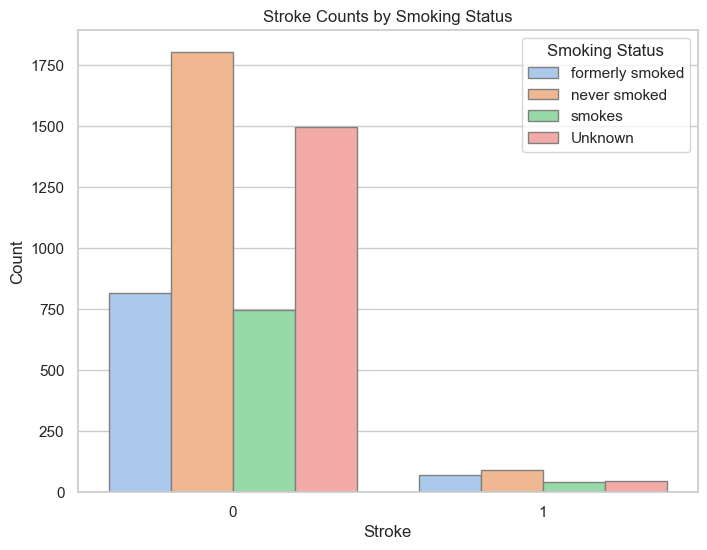

In [47]:
# create the plot
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='stroke', hue='smoking_status', data=df, palette='pastel', edgecolor='gray', ax=ax)

# add titles and labels
ax.set_title('Stroke Counts by Smoking Status')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')
ax.legend(title='Smoking Status')

# show the plot
plt.show()


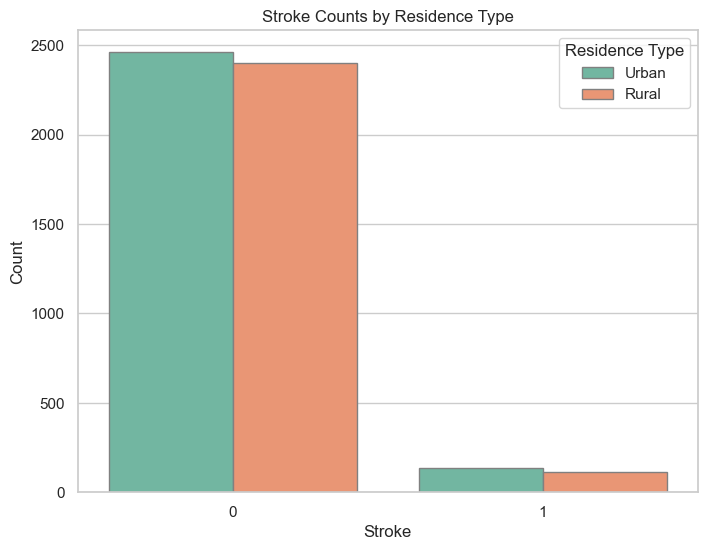

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='stroke', hue='Residence_type', data=df, palette='Set2', edgecolor='gray', ax=ax)

# add titles and labels
ax.set_title('Stroke Counts by Residence Type')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count')
ax.legend(title='Residence Type')

# show the plot
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='count'>

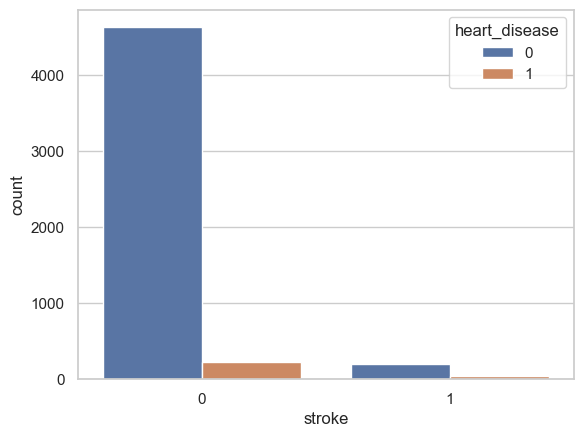

In [49]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

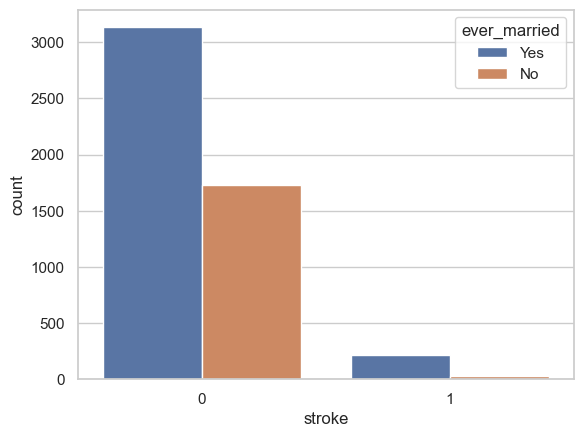

In [50]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

# Update required

# Creating dummy variables for numeric-binary attributes

Creating dummy variables for numeric-binary attributes involves creating new columns in a DataFrame to represent the binary values of the original attribute.

For example, if the original attribute has two unique values, say 0 and 1, the dummy variable creation will involve creating two new columns, where one column represents the presence of the value 0 and the other column represents the presence of the value 1. Each of these new columns will have binary values (0 or 1) indicating the presence or absence of the original attribute value in that row.

The purpose of creating dummy variables is to convert categorical data into a format that can be more easily used for machine learning algorithms that require numeric input. Additionally, dummy variables can help to reduce the effect of the order of categorical values in the original attribute.

##### PUT IN FILE (HAVE TO READ MORE ON THIS) 

In [51]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)

In [52]:
# The data frame after performing dummy attributes
df.head()

,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,1,0,0,1,1,0,1,0,0,1,1,0,0,1
1,51676,61.0,202.21,28.1,0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,31112,80.0,105.92,32.5,1,0,0,1,1,0,1,0,0,0,0,1,0,1
3,60182,49.0,171.23,34.4,0,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1665,79.0,174.12,24.0,0,0,1,0,1,0,0,1,0,0,0,1,0,1


## Random Over Sampler

#### Due to the imbalanced distribution of target instances in our dataset, we will utilize an oversampling technique to ensure that both target classes are equally represented.

In [56]:
from imblearn.over_sampling import RandomOverSampler

# Create RandomOverSampler object with sampling strategy 'minority'
ros = RandomOverSampler(sampling_strategy='minority')

# Split the dataframe into features (X) and target (y)
X = df.drop(['stroke_1'], axis=1)
y = df['stroke_1']

# Perform oversampling on the training data
X_over, y_over = ros.fit_resample(X, y)


In [55]:
#pip install imblearn 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 3.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [59]:

# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])


## Scaling the numeric values for bringing them all to the same scale

### the sampling_strategy parameter is set to 'minority', which means that the number of samples in the minority class will be increased to match the number of samples in the majority class.

In [61]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [62]:
# Printing the shape of the training and testing data splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


X_train: (7777, 17)
y_train: (7777,)
X_test: (1945, 17)
y_test: (1945,)


# ML Training models

## Decision Tree

In [64]:
# Importing the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred = clf.predict(X_test)

# Printing the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9712082262210797


## KNN 

In [68]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
)

# Create KNN classifier with 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels and probabilities of the test data
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Print the performance metrics of the model
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))
#print('Precision Score:', precision_score(y_test, y_pred))
#print('Recall Score:', recall_score(y_test, y_pred))
#print('F1 Score:', f1_score(y_test, y_pred))


Accuracy: 0.9784061696658097
ROC AUC Score: 0.9784615384615385


## XGBoost 
Gradient boosting is a machine learning technique that involves building an ensemble of decision trees in a sequential manner, where each subsequent tree is trained to improve the errors of the previous trees. The process involves creating a set of decision trees and iteratively refining them by adding new trees that complement the already trained ones. Gradient boosting is known for its ability to achieve high accuracy in a variety of tasks, including classification, regression, and ranking.

XGBoost is particularly powerful because it offers many advanced features, such as a variety of regularization techniques, parallel processing, cross-validation, early stopping, and handling missing data. These features allow it to produce high-quality models with high accuracy, even when working with very large datasets.

Accuracy: 0.979948586118252
ROC AUC Score: 0.9991879460745441


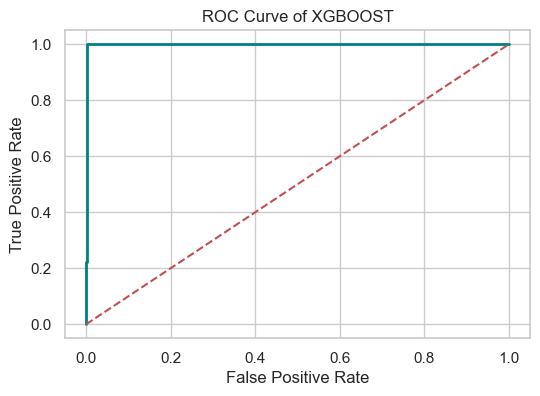

In [71]:
# Import required libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the classifier object
xgb_model = xgb.XGBClassifier()

# Train the classifier
xgb_model.fit(X_train, y_train)

# Predict using the test dataset
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate and print the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0,1], [0,1], 'r--')
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [70]:
#pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


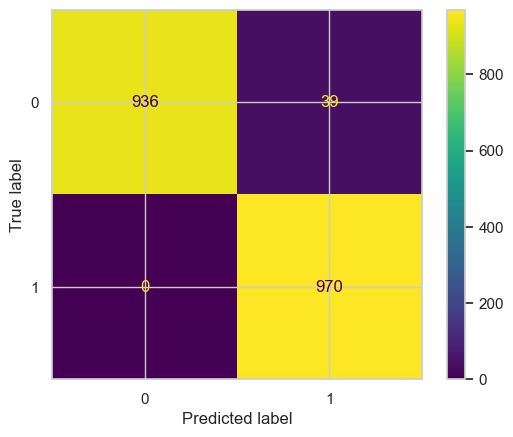

In [72]:
# Import required libraries
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix of the model
plot_confusion_matrix(xgb_model, X_test, y_test)


In [73]:
# Import required libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print the performance metrics of the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("ROC AUC Score: {:.2f}".format(roc_auc))


Accuracy: 0.98
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC AUC Score: 1.00


# Random Forest

In [75]:
# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9974293059125964


In [76]:
# Import required libraries
from sklearn.model_selection import KFold, cross_val_score

# Create the KFold object with 20 splits
kfold = KFold(n_splits=20, shuffle=True)

# Perform k-fold cross validation and print the results
scores = cross_val_score(rf_clf, X_over, y_over, cv=kfold)
accuracy = scores.mean() * 100
print("Accuracy: {:.2f}".format(accuracy))
print("Cross Validation Scores:")
print(scores)


Accuracy: 99.72
Cross Validation Scores:
[1.         1.         0.99794239 0.99588477 1.         0.99794239
 0.99176955 0.99382716 0.99794239 1.         1.         0.99382716
 0.99794239 0.99382716 0.99794239 0.99794239 0.99176955 1.
 0.99794239 0.99794239]


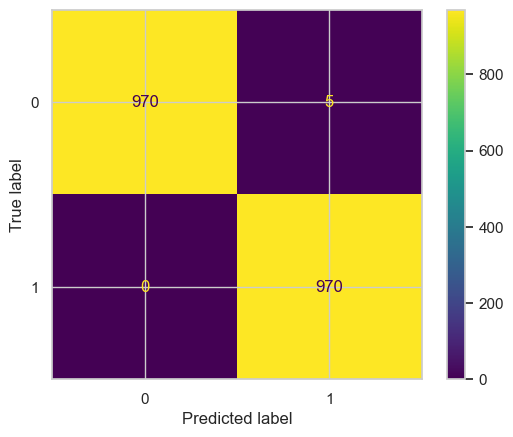

In [77]:
# Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix,precision_recall_fscore_support
plot_confusion_matrix(rf_clf,X_test,y_test)